In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [31]:
df  = pd.read_csv('loan_approval_dataset.csv')

In [32]:

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nData types of columns:\n", df.dtypes)

# Display summary statistics
print("\nSummary statistics:\n", df.describe())

Shape of the dataset: (4269, 13)

Columns: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Data types of columns:
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

Summary statistics:
            loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000

In [33]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [41]:
x = df.select_dtypes(include = ['number'])

In [42]:
x.columns = x.columns.str.strip()

In [43]:
x['assets_value'] = x['residential_assets_value'] + x['commercial_assets_value'] + x['luxury_assets_value'] + x['bank_asset_value']

sc = StandardScaler()
X_sc = sc.fit_transform(x)

In [45]:
# Importing PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X_sc)
x_pca = pca.transform(X_sc)



print(x_pca)


[[ 3.01473593 -0.14686202]
 [-1.5086772   0.80751519]
 [ 3.42816135  0.18691826]
 ...
 [ 1.38360219 -1.12326591]
 [-0.5475818  -1.35004424]
 [ 4.91552105 -1.04158955]]


In [46]:
#y = df['loan_status']
#y = df.loc[:, 'loan_status']
#y = df.iloc[:, df.columns.get_loc('loan_status')]
Y = df.select_dtypes(include = ['object'])



In [47]:

Y.head()
Y.columns = Y.columns.str.strip()
y = Y['loan_status']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [49]:

rf_classifier = RandomForestClassifier(random_state=42)

dc_classifier = DecisionTreeClassifier(random_state=42)

In [50]:

rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


dc_classifier.fit(X_train, y_train)

y_pred1 = rf_classifier.predict(X_test)




In [51]:

accuracy = accuracy_score(y_test, y_pred)
print("RF Accuracy:", accuracy)

accuracy1 = accuracy_score(y_test, y_pred1)
print("DC Accuracy:", accuracy1)

RF Accuracy: 0.5866510538641686
DC Accuracy: 0.5866510538641686


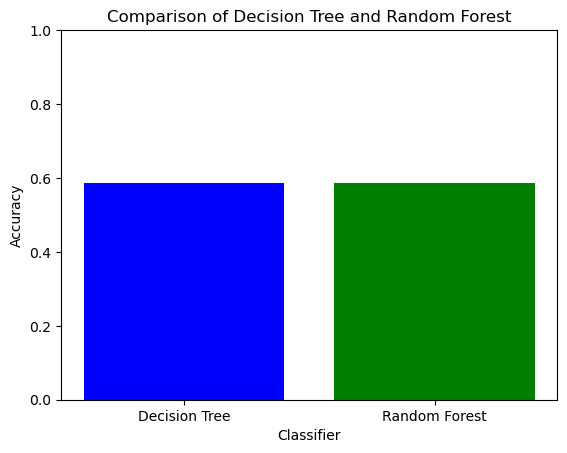

In [52]:



import matplotlib.pyplot as plt
labels = ['Decision Tree', 'Random Forest']
accuracies = [accuracy1, accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree and Random Forest')
plt.ylim(0.0, 1.0)
plt.show()
